# Generative Adversarial Network on MNIST 

In [209]:
import matplotlib.pyplot as plt
%matplotlib inline

In [210]:
import torch
import torchvision
import torch.utils.data as Data
import numpy as np
import torch.nn as nn
torch.manual_seed(7)
np.random.seed(7)

### One take away there, start with small learning rate!!!

In [211]:
BATCH_SIZE = 64 
LR_G = 0.0002 # Learning rate for G network
LR_D = 0.0002 # Learning rate for D network
INPUT_DIMENSION = 784
INPUT_NUMBERS = 100
N_NODES = 128

## 1. Load MNIST Data

In [212]:
mnist_trainset=torchvision.datasets.MNIST('MNIST',download=True,transform=torchvision.transforms.ToTensor())

## 2. Create Two Networks

In [221]:
Generator = nn.Sequential(
    nn.Linear(INPUT_NUMBERS,N_NODES),
    nn.LeakyReLU(),
    nn.Linear(N_NODES,INPUT_DIMENSION),
    nn.Tanh(),
)

Discriminator = nn.Sequential(
    nn.Linear(INPUT_DIMENSION,N_NODES),
    nn.LeakyReLU(),
    nn.Linear(N_NODES,1),
    nn.Sigmoid(),
)

## 3. Model Training

In [222]:
# Here we will do the batch training.

In [223]:
train_loader = Data.DataLoader(dataset=mnist_trainset, batch_size=BATCH_SIZE, shuffle=True)

In [224]:
opt_D = torch.optim.Adam(Discriminator.parameters(), lr=LR_D)
opt_G = torch.optim.Adam(Generator.parameters(), lr=LR_G)

(tensor(1.4362), tensor(-0.6883))
(tensor(1.6968), tensor(-0.7932))
(tensor(0.9881), tensor(-0.4952))
(tensor(1.2089), tensor(-0.7510))
(tensor(0.7400), tensor(-0.3375))
(tensor(0.9481), tensor(-0.5138))
(tensor(0.7264), tensor(-0.3843))
(tensor(1.3787), tensor(-0.6746))
(tensor(0.6309), tensor(-0.2765))
(tensor(1.0045), tensor(-0.4756))
(tensor(0.7913), tensor(-0.3832))
(tensor(0.9340), tensor(-0.4851))
(tensor(0.6610), tensor(-0.3661))
(tensor(1.0310), tensor(-0.4795))
(tensor(0.9714), tensor(-0.4218))
(tensor(0.9840), tensor(-0.4202))
(tensor(0.7570), tensor(-0.4193))
(tensor(1.1932), tensor(-0.5775))
(tensor(0.7686), tensor(-0.3955))
(tensor(0.4474), tensor(-0.2560))
(tensor(0.4750), tensor(-0.2422))
(tensor(0.6845), tensor(-0.3121))
(tensor(0.4234), tensor(-0.1903))
(tensor(0.5712), tensor(-0.2309))
(tensor(0.5351), tensor(-0.2566))
(tensor(0.5931), tensor(-0.2690))
(tensor(0.6021), tensor(-0.2534))
(tensor(0.7639), tensor(-0.4123))
(tensor(0.8502), tensor(-0.5270))
(tensor(0.6412

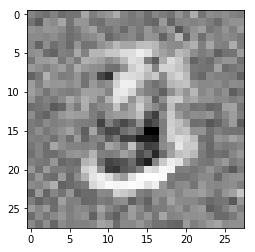

In [225]:
for epoch in range(100):
    
    for step, (true_x, true_y) in enumerate(train_loader):
    # Reshape data
        true_x= true_x.view(-1,INPUT_DIMENSION)
    # Random generate noise data
        NOISE_SIZE = true_x.shape[0]
        noise_x = torch.randn(NOISE_SIZE, INPUT_NUMBERS)
    # G Model
        fake_x = Generator(noise_x)
    # D Model
        prob0 = Discriminator(true_x)
        prob1 = Discriminator(fake_x)

    # Calculate Loss
        D_loss = - torch.mean(torch.log(prob0) + torch.log(1. - prob1))
        G_loss = torch.mean(torch.log(1. - prob1))
    # Optimization
        opt_D.zero_grad()
        D_loss.backward(retain_graph=True)      # reusing computational graph
        opt_D.step()

        opt_G.zero_grad()
        G_loss.backward()
        opt_G.step()
        
        if step % 500 == 0:  # plotting
            print(D_loss,G_loss)
            #print('True_prob{},Fake_prob{}'.format(prob0,prob1))
            fake_pic = fake_x.view(-1,28,28).data.numpy()[0]
            plt.cla()
            plt.imshow(fake_pic,cmap='Greys_r')

In [114]:
#g_model = torch.load('Generator.pt')
#d_model = torch.load('Discriminator.pt')
#Generator.load_state_dict(g_model())
#Discriminator.load_state_dict(d_model())

In [203]:
z = true_x[10].view(28,28)
z_small = z[10:20,10:20]
z_final=z_small.contiguous().view(-1,100)

# Check Samples from the Generator

In [244]:
def view_samples(epoch, samples):
    fig, axes = plt.subplots(figsize=(7,7), nrows=4, ncols=4, sharey=True, sharex=True)
    for ax, img in zip(axes.flatten(), samples[epoch]):
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        im = ax.imshow(img.view(28,28).data.numpy(), cmap='Greys_r')
    
    return fig, axes

In [262]:
noise_x = torch.randn(16, INPUT_NUMBERS)
figures_x = Generator(noise_x)

In [263]:
noise_x

tensor([[ 0.3592,  0.6325, -1.7280,  ..., -0.4492, -0.5821,  0.4910],
        [-1.3903,  0.0171, -1.1273,  ..., -0.7355, -0.8141,  1.1916],
        [ 0.9640, -1.6183, -1.1877,  ..., -0.9044, -0.3777, -1.5615],
        ...,
        [ 1.1883, -0.9338,  1.0519,  ..., -0.5403, -0.8542,  1.3118],
        [ 0.2938, -0.0190, -1.0952,  ...,  0.0939, -0.3021,  0.6343],
        [-0.0525,  1.3391, -1.2802,  ...,  1.1374,  0.1974,  1.3754]])

(<matplotlib.figure.Figure at 0x116539890>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118b976d0>,
       dtype=object))

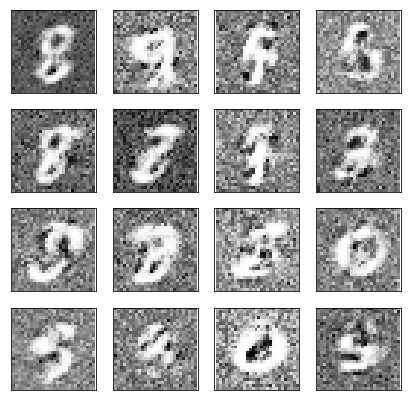

In [264]:
view_samples(0,[figures_x])

It seems that we are able to generate some number from the random number, especially 8, 1, but it seems that we still have way to much noise and the display is not that well. We can improve it in the next convolutional GAN I think. 